# Import Libraries

In [98]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
#from sklearn.preprocessing import LabelBinarizer

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.9.1


# Import Dataset from csv file

In [99]:
df = pd.read_csv(r'Dataset\dataset-song-genre.csv')
print(df)

                     track_id                       artists  \
0      3txHZTpGeVASXa5ARwoRX6                        Frejat   
1      2e7LBdeiidf0ZC5Qj52u0G                         STU48   
2      0hlh787aY52rcNvJHnE0Ml             Mike NRG;Weapon X   
3      3s067jTdOv8wnuUHeXdtjT        NICO Touches the Walls   
4      4oE62AqzUuiwV09HGxiMlu       Edvard Grieg;Una Bourne   
...                       ...                           ...   
91195  0Y1hw2GXV8npQI7C21ZIT1                      Surfaces   
91196  43QSsuxazI8xms29SYCtxh                 KANA-BOON;もっさ   
91197  7nbj09isjVmgNYJ7eKBzyt                    Zach Bryan   
91198  5bVUUTXB0Dg7EzuSZC57ek  Joey Montana;Sebastian Yatra   
91199  2RjWCcfCOMzKeRJzeoe4h6            Noisia;The Upbeats   

                                album_name  \
0            Frejat Ao Vivo No Rock In Rio   
1                       無謀な夢は覚めることがない【劇場盤】   
2         Lost in Dreams (Q-Base OST 2008)   
3                                     オーロラ   
4      Mozart

In [100]:
df.shape

(91200, 20)

# Estamos verificando datos con fallas y eliminandolos del dataframe

In [101]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [102]:
df = df.dropna()

In [103]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# volvemos datos booleanos a numéricos

In [104]:
df = df.astype({'explicit':'int'})

In [105]:
df['explicit']

0        0
1        0
2        0
3        0
4        0
        ..
91195    0
91196    0
91197    0
91198    0
91199    0
Name: explicit, Length: 91199, dtype: int32

In [106]:
# dividing dataset to data to train and data to test
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [107]:
train_dataset.shape

(72959, 20)

In [108]:
test_dataset.shape

(18240, 20)

In [109]:
#know the column labels from dataset
train_dataset.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [110]:
#sns.pairplot(train_dataset[['popularity',
#       'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'key',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'time_signature', 'track_genre']], diag_kind="kde")

In [111]:
train_dataset = train_dataset.drop(['track_id','artists','album_name','track_name','explicit','key','time_signature'],axis=1)

In [112]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,33.331529,22.294772,0.000,17.0000,35.00000,50.0000,100.000
duration_ms,72959.0,227690.246810,106562.673902,8586.000,174062.0000,212845.00000,260907.5000,4789026.000
danceability,72959.0,0.567351,0.173699,0.000,0.4560,0.58100,0.6960,0.985
energy,72959.0,0.641243,0.251494,0.000,0.4730,0.68400,0.8530,1.000
loudness,72959.0,-8.266214,5.055703,-49.531,-10.0200,-7.00000,-4.9995,3.156
mode,72959.0,0.637564,0.480707,0.000,0.0000,1.00000,1.0000,1.000
speechiness,72959.0,0.084279,0.104907,0.000,0.0359,0.04890,0.0842,0.965
acousticness,72959.0,0.314746,0.332257,0.000,0.0170,0.16900,0.5970,0.996
instrumentalness,72959.0,0.155217,0.309202,0.000,0.0000,0.00004,0.0461,1.000
liveness,72959.0,0.213076,0.189739,0.000,0.0980,0.13200,0.2730,1.000


In [113]:
train_dataset.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,0,18,54,44,23,10,10,78,43,0,...,0,56,1,53,66,1,21,76,0,0
duration_ms,164818,67725,200021,193012,268426,183169,156720,241970,380800,129332,...,229826,177525,266706,232178,169813,630595,278520,194165,159735,227280
danceability,0.754,0.435,0.776,0.846,0.546,0.423,0.405,0.727,0.224,0.798,...,0.714,0.703,0.485,0.849,0.623,0.159,0.599,0.609,0.682,0.874
energy,0.763,0.712,0.814,0.747,0.969,0.206,0.469,0.681,0.499,0.625,...,0.671,0.498,0.924,0.378,0.796,0.181,0.583,0.449,0.919,0.69
loudness,-4.627,-8.452,-5.86,-5.998,-5.05,-23.209,-12.32,-7.114,-7.4,-6.83,...,-5.119,-6.688,-4.046,-11.972,-2.981,-18.412,-6.96,-13.291,-3.18,-6.373
mode,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1
speechiness,0.0435,0.153,0.0737,0.0694,0.0512,0.0345,0.0437,0.0265,0.0379,0.13,...,0.362,0.0805,0.0579,0.0455,0.199,0.0566,0.0273,0.249,0.0874,0.114
acousticness,0.0301,0.000163,0.0336,0.0694,0.00196,0.936,0.452,0.00214,0.0379,0.383,...,0.292,0.0639,0.0373,0.324,0.659,0.979,0.624,0.326,0.256,0.121
instrumentalness,0.000022,0.916,0.0,0.0,0.000051,0.947,0.0,0.000307,0.000007,0.000033,...,0.0,0.0284,0.000002,0.583,0.0,0.912,0.000078,0.000115,0.0,0.0
liveness,0.0901,0.184,0.109,0.144,0.142,0.1,0.383,0.0861,0.078,0.125,...,0.325,0.113,0.248,0.293,0.115,0.072,0.37,0.147,0.443,0.249


In [114]:
train_labels = train_dataset.pop('track_genre')

In [115]:
label_dict = dict(enumerate(set(train_labels)))

In [116]:
inv_label_dict = {v: k for k, v in label_dict.items()}

In [117]:
inv_label_dict

{'mandopop': 0,
 'opera': 1,
 'jazz': 2,
 'afrobeat': 3,
 'hardcore': 4,
 'r-n-b': 5,
 'j-dance': 6,
 'folk': 7,
 'disney': 8,
 'detroit-techno': 9,
 'french': 10,
 'british': 11,
 'world-music': 12,
 'iranian': 13,
 'samba': 14,
 'rockabilly': 15,
 'gospel': 16,
 'latino': 17,
 'romance': 18,
 'trance': 19,
 'turkish': 20,
 'sleep': 21,
 'trip-hop': 22,
 'honky-tonk': 23,
 'bluegrass': 24,
 'dance': 25,
 'chicago-house': 26,
 'brazil': 27,
 'edm': 28,
 'metal': 29,
 'punk-rock': 30,
 'rock': 31,
 'forro': 32,
 'dub': 33,
 'reggae': 34,
 'singer-songwriter': 35,
 'progressive-house': 36,
 'ambient': 37,
 'songwriter': 38,
 'ska': 39,
 'reggaeton': 40,
 'j-idol': 41,
 'electronic': 42,
 'drum-and-bass': 43,
 'kids': 44,
 'j-rock': 45,
 'chill': 46,
 'new-age': 47,
 'acoustic': 48,
 'synth-pop': 49,
 'latin': 50,
 'sad': 51,
 'disco': 52,
 'comedy': 53,
 'psych-rock': 54,
 'country': 55,
 'blues': 56,
 'breakbeat': 57,
 'metalcore': 58,
 'pop-film': 59,
 'guitar': 60,
 'malay': 61,
 'hap

In [118]:
inv_label_dict['salsa']

95

In [119]:
len(inv_label_dict)

114

In [120]:
train_labels_num = []
for label in train_labels:
    train_labels_num.append(inv_label_dict[label])

train_labels_num

[25,
 88,
 85,
 76,
 84,
 107,
 23,
 90,
 33,
 34,
 71,
 105,
 108,
 10,
 0,
 24,
 70,
 88,
 106,
 97,
 6,
 2,
 18,
 80,
 107,
 79,
 110,
 61,
 27,
 90,
 83,
 25,
 70,
 67,
 94,
 30,
 3,
 44,
 75,
 58,
 101,
 71,
 107,
 19,
 107,
 100,
 74,
 42,
 48,
 6,
 77,
 77,
 57,
 14,
 12,
 108,
 7,
 35,
 90,
 65,
 41,
 50,
 84,
 48,
 30,
 37,
 76,
 41,
 19,
 59,
 34,
 32,
 38,
 76,
 51,
 82,
 9,
 6,
 102,
 73,
 105,
 41,
 4,
 65,
 8,
 25,
 98,
 52,
 113,
 53,
 98,
 98,
 55,
 88,
 4,
 29,
 91,
 104,
 44,
 58,
 55,
 19,
 61,
 84,
 88,
 83,
 112,
 47,
 107,
 107,
 72,
 44,
 90,
 50,
 71,
 7,
 87,
 31,
 113,
 6,
 62,
 92,
 2,
 62,
 50,
 34,
 3,
 65,
 23,
 83,
 66,
 65,
 10,
 32,
 57,
 37,
 26,
 108,
 87,
 37,
 110,
 113,
 10,
 66,
 50,
 84,
 51,
 113,
 72,
 37,
 8,
 86,
 16,
 9,
 70,
 76,
 91,
 111,
 15,
 72,
 35,
 51,
 22,
 105,
 28,
 66,
 105,
 97,
 44,
 35,
 46,
 3,
 75,
 95,
 83,
 103,
 57,
 59,
 2,
 10,
 27,
 5,
 111,
 19,
 61,
 54,
 65,
 20,
 84,
 52,
 23,
 0,
 68,
 60,
 56,
 7,
 67,
 101,
 75

In [121]:
train_labels

5413          dance
64083     grindcore
62381    deep-house
24917        indian
73671    industrial
            ...    
9457        iranian
58285    show-tunes
89873     indie-pop
62841       hip-hop
75130     reggaeton
Name: track_genre, Length: 72959, dtype: object

In [122]:
#train_labels.assign(labels_num = train_labels_num)

# Normalizando los datos


In [123]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,1.967690e-16,1.0,-1.495038,-0.732527,0.074837,0.747640,2.990319
duration_ms,72959.0,4.342160e-17,1.0,-2.056107,-0.503255,-0.139310,0.311716,42.804254
danceability,72959.0,5.179309e-14,1.0,-3.266287,-0.641055,0.078581,0.740646,2.404445
energy,72959.0,-8.411438e-15,1.0,-2.549740,-0.668977,0.170011,0.841996,1.426504
loudness,72959.0,2.202361e-14,1.0,-8.162027,-0.346893,0.250453,0.646144,2.259273
mode,72959.0,-3.361163e-15,1.0,-1.326303,-1.326303,0.753965,0.753965,0.753965
speechiness,72959.0,2.089112e-14,1.0,-0.803361,-0.461155,-0.337236,-0.000749,8.395221
acousticness,72959.0,8.131865e-15,1.0,-0.947298,-0.896133,-0.438656,0.849504,2.050381
instrumentalness,72959.0,9.368210e-15,1.0,-0.501991,-0.501991,-0.501861,-0.352897,2.732141
liveness,72959.0,-9.422616e-15,1.0,-1.122998,-0.606498,-0.427305,0.315821,4.147401


In [124]:
normed_train_data.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,-1.495038,-0.687674,0.927055,0.478519,-0.463406,-1.046502,-1.046502,2.003540,0.433665,-1.495038,...,-1.495038,1.016762,-1.450184,0.882201,1.465297,-1.450184,-0.553113,1.913833,-1.495038,-1.495038
duration_ms,-0.590003,-1.501138,-0.259652,-0.325426,0.382270,-0.417794,-0.665995,0.134003,1.436805,-0.923008,...,0.020042,-0.470758,0.366130,0.042114,-0.543129,3.780918,0.476994,-0.314606,-0.637702,-0.003850
danceability,1.074557,-0.761954,1.201213,1.604209,-0.122917,-0.831039,-0.934666,0.919116,-1.976699,1.327869,...,0.844274,0.780946,-0.474099,1.621481,0.320379,-2.350910,0.182209,0.239780,0.660047,1.765408
energy,0.484134,0.281346,0.686922,0.420514,1.303240,-1.730633,-0.684882,0.158082,-0.565594,-0.064588,...,0.118320,-0.569570,1.124309,-1.046720,0.615350,-1.830040,-0.231590,-0.764406,1.104428,0.193868
loudness,0.719824,-0.036748,0.475941,0.448645,0.636156,-2.955630,-0.801824,0.227904,0.171334,0.284078,...,0.622508,0.312165,0.834743,-0.732991,1.045396,-2.006800,0.258364,-0.993885,1.006035,0.374471
mode,-1.326303,0.753965,-1.326303,-1.326303,-1.326303,-1.326303,0.753965,-1.326303,-1.326303,0.753965,...,0.753965,-1.326303,0.753965,-1.326303,-1.326303,0.753965,0.753965,-1.326303,-1.326303,0.753965
speechiness,-0.388710,0.655067,-0.100837,-0.141826,-0.315312,-0.474500,-0.386804,-0.550758,-0.442090,0.435826,...,2.647298,-0.036018,-0.251446,-0.369646,1.093548,-0.263838,-0.543132,1.570159,0.029754,0.283311
acousticness,-0.856706,-0.946808,-0.846172,-0.738424,-0.941399,1.869798,0.413095,-0.940857,-0.833230,0.205424,...,-0.068460,-0.754977,-0.835036,0.027851,1.036106,1.999216,0.930766,0.033870,-0.176810,-0.583122
instrumentalness,-0.501919,2.460474,-0.501991,-0.501991,-0.501825,2.560732,-0.501991,-0.500998,-0.501967,-0.501883,...,-0.501991,-0.410141,-0.501985,1.383508,-0.501991,2.447538,-0.501737,-0.501619,-0.501991,-0.501991
liveness,-0.648135,-0.153244,-0.548524,-0.364060,-0.374601,-0.595958,0.895565,-0.669216,-0.711906,-0.464198,...,0.589882,-0.527442,0.184061,0.421229,-0.516902,-0.743529,0.827050,-0.348249,1.211789,0.189332


# Construyendo el modelo

In [125]:
len(normed_train_data.keys())

12

In [126]:
normed_train_data.shape

(72959, 12)

In [127]:
len(label_dict)

114

In [128]:
model = keras.Sequential([
    keras.layers.Dense(62, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(62, activation='relu'),
    keras.layers.Dense(62, activation='relu'),
    keras.layers.Dense(62, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
])

In [129]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 62)                806       
                                                                 
 dense_11 (Dense)            (None, 62)                3906      
                                                                 
 dense_12 (Dense)            (None, 62)                3906      
                                                                 
 dense_13 (Dense)            (None, 62)                3906      
                                                                 
 dense_14 (Dense)            (None, 114)               7182      
                                                                 
Total params: 19,706
Trainable params: 19,706
Non-trainable params: 0
_________________________________________________________________


In [131]:
train_labels_num = np.array(train_labels_num)

In [132]:
hist = model.fit(normed_train_data, train_labels_num, validation_split = 0.2, epochs=10)

Epoch 1/10
1824/1824 [==============================] - 3s 1ms/step - loss: 3.5544 - accuracy: 0.1554 - val_loss: 3.2259 - val_accuracy: 0.2000
Epoch 2/10
1824/1824 [==============================] - 2s 1ms/step - loss: 3.0847 - accuracy: 0.2231 - val_loss: 3.0362 - val_accuracy: 0.2349
Epoch 3/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.9454 - accuracy: 0.2485 - val_loss: 2.9532 - val_accuracy: 0.2515
Epoch 4/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.8537 - accuracy: 0.2636 - val_loss: 2.8710 - val_accuracy: 0.2619
Epoch 5/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7842 - accuracy: 0.2742 - val_loss: 2.8469 - val_accuracy: 0.2606
Epoch 6/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7352 - accuracy: 0.2841 - val_loss: 2.7967 - val_accuracy: 0.2749
Epoch 7/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.6949 - accuracy: 0.2899 - val_loss: 2.7568 - val_accuracy:

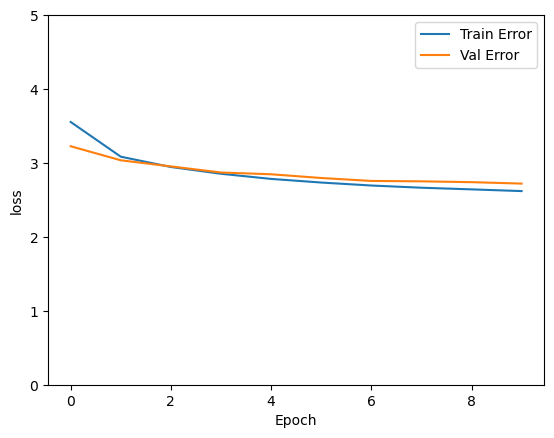

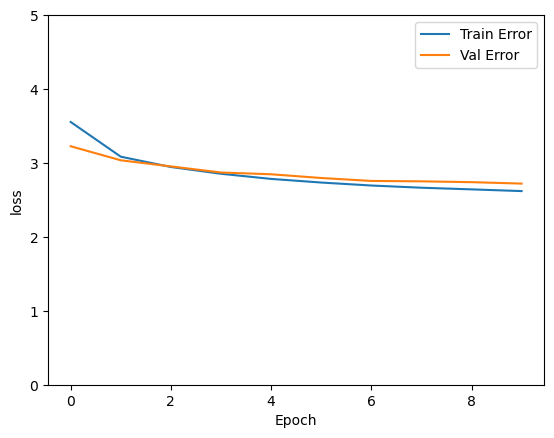

In [133]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.show()

plot_history(hist)